### The Masters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plp
%matplotlib inline

## Importing Data Sets

I created datasets based on data from the Masters Website.

In [2]:
winners = pd.read_excel('Masters_Winners.xlsx')

In [3]:
scores = pd.read_excel('Masters_Scores.xlsx')

In [4]:
victories = pd.read_excel('Most_Victories.xlsx')

In [5]:
winners.index = pd.RangeIndex(start=1, stop=len(winners)+1)

This code I need to apply to all datasets. That is because in Python, the first column is row 0 instead of row 1.

In [6]:
winners

,Year,Name,DOB,Winning Scores,Margin
1,1934,Horton Smith,05/22/1908,284,1.0
2,1935,Gene Sarazen,02/27/1902,282,NaN
3,1936,Horton Smith,05/22/1908,285,1.0
4,1937,Byron Nelson,02/04/1912,283,2.0
5,1938,Henry Picard,11/28/1906,285,2.0
...,...,...,...,...,...
84,2020,Dustin Johnson,6/22/1984,268,5.0
85,2021,Hideki Matsuyama,2/25/1992,278,1.0
86,2022,Scottie Scheffler,6/21/1996,278,3.0
87,2023,Jon Rahm,11/10/1994,276,4.0


Margins that are NAN are that way, because it went into a Playoff. That means that two players were tied, and they would go into a Playoff format, where the golfers would go into a 1 v 1 on extra holes, until one player wins outright.

In [7]:
scores.index = pd.RangeIndex(start=1, stop=len(scores)+1)

In [8]:
scores

,Year,Name,Ranking.1,Shots.1,Score.1,TotalShots.2,Ranking.2,Shots.2,Score.2,TotalShots.3,Ranking.3,Shots.3,Score.3,TotalShots.4,Shots.4,Score.4
1,1934,Horton Smith,1,70,-2,142,1,72,0,212,1,70,-2,284,72,0
2,1935,Gene Sarazen,2,68,-4,139,2,71,-1,212,4,73,1,282,70,-2
3,1936,Horton Smith,3,74,2,145,4,71,-1,213,2,68,-4,285,72,0
4,1937,Byron Nelson,1,66,-6,138,1,72,0,213,3,75,3,283,70,-2
5,1938,Henry Picard,4,71,-1,143,2,72,0,215,1,72,0,285,70,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020,Dustin Johnson,1,65,-7,135,1,70,-2,200,1,65,-7,268,68,-4
85,2021,Hideki Matsuyama,2,69,-3,140,6,71,-1,205,1,65,-7,278,73,1
86,2022,Scottie Scheffler,3,69,-3,136,1,67,-5,207,1,71,-1,278,71,-1
87,2023,Jon Rahm,1,65,-7,134,1,69,-3,207,2,73,1,276,69,-3


So I could combine two of the datasets, rather than have a column header titled "Day 1" and the respective Shots, Rankings and Scores fall below that, I ended each category with the respective day of the masters. If you don't watch golf, all tournaments take place over the course of 4 days.

In this dataset, I created two tabs for days 2, 3 & 4: the TotalShots (which is the combined amount of shots taken throughout the tournament), and Shots (shots taken on that particular day). Day 1 just has the Shots category, given its the first day of the tournament.  

## Victories 

In [9]:
victories.index = pd.RangeIndex(start=1, stop=len(victories)+1)

In [10]:
victories

,Golfer Name,# of Victories
1,Jack Nicklaus,6
2,Tiger Woods,5
3,Arnold Palmer,4
4,Jimmy Demaret,3
5,Sam Snead,3
6,Gary Player,3
7,Nick Faldo,3
8,Phil Mickleson,3
9,Horton Smith,2
10,Byron Nelson,2


As you can see, only 20% of the Masters Champions repeated in their career. Most notably, Jack Nicklaus has won the most Masters, followed by Tiger Woods and Arnold Palmer. 

Scottie Scheffler joins this list, after his 2024 Masters Victory.

<AxesSubplot:xlabel='# of Victories', ylabel='count'>

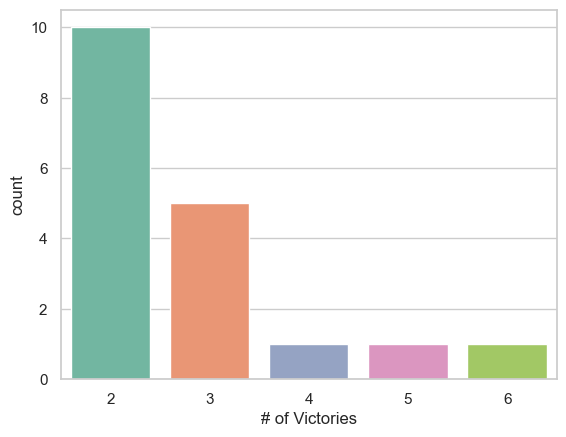

In [11]:
sns.set_theme(style="whitegrid", palette="Set2")
sns.countplot(x='# of Victories',data=victories)

I wanted to look further into this dataset, and found some shocking results: Dual winners accounted for nearly 50% of the total Masters victories. That means that a little over half of the winners have only won 1 Master Tournament. 

## Merging Data Sets

In [12]:
winners_data = pd.merge(winners,scores, on=['Name', 'Year'])

Because in these data sets, they have two of the same column names, I combined it into one larger dataset, titled "Winners_Data".

In [13]:
winners_data.index = pd.RangeIndex(start=1, stop=len(winners_data)+1)
print("")

In [14]:
winners_data

,Year,Name,DOB,Winning Scores,Margin,Ranking.1,Shots.1,Score.1,TotalShots.2,Ranking.2,Shots.2,Score.2,TotalShots.3,Ranking.3,Shots.3,Score.3,TotalShots.4,Shots.4,Score.4
1,1934,Horton Smith,05/22/1908,284,1.0,1,70,-2,142,1,72,0,212,1,70,-2,284,72,0
2,1935,Gene Sarazen,02/27/1902,282,NaN,2,68,-4,139,2,71,-1,212,4,73,1,282,70,-2
3,1936,Horton Smith,05/22/1908,285,1.0,3,74,2,145,4,71,-1,213,2,68,-4,285,72,0
4,1937,Byron Nelson,02/04/1912,283,2.0,1,66,-6,138,1,72,0,213,3,75,3,283,70,-2
5,1938,Henry Picard,11/28/1906,285,2.0,4,71,-1,143,2,72,0,215,1,72,0,285,70,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,2020,Dustin Johnson,6/22/1984,268,5.0,1,65,-7,135,1,70,-2,200,1,65,-7,268,68,-4
85,2021,Hideki Matsuyama,2/25/1992,278,1.0,2,69,-3,140,6,71,-1,205,1,65,-7,278,73,1
86,2022,Scottie Scheffler,6/21/1996,278,3.0,3,69,-3,136,1,67,-5,207,1,71,-1,278,71,-1
87,2023,Jon Rahm,11/10/1994,276,4.0,1,65,-7,134,1,69,-3,207,2,73,1,276,69,-3


For context, Shots is the amount of shots a golfer took over 18 holes. 

In golf, a score represents the total number of strokes taken to complete a round of golf, typically consisting of 18 holes. The goal is to complete each hole in as few strokes as possible, with the overall objective of achieving the lowest score possible.

In most cases, each hole on a golf course is assigned a specific "par" value, which represents the number of strokes a skilled golfer should take to complete the hole. For example, a par 4 hole would typically require the golfer to hit the ball four times before reaching the green and putting the ball into the hole.

## Analyzing Data

### Average Winning Scores

In [15]:
winning_scores = winners_data["Winning Scores"].mean()

print("")

In [16]:
winning_scores

279.29545454545456

As you can see, the average winning score is 279.36 strokes. Given the average daily score is 72, and the tournament is 4 days, the average winning score would be -9 (or 9 under par).

### Winning Margin

In [17]:
winning_margin = winners_data["Margin"].mean()

In [18]:
winning_margin

2.647887323943662

The average winning margin for Masters Winners is roughly 3 strokes.

### Lowest Overall Score

In [19]:
# calculate the total score for each player across all 4 days
winners_data['total_score'] = (
    winners_data['Shots.1'] + 
    winners_data['Shots.2'] + 
    winners_data['Shots.3'] + 
    winners_data['Shots.4']
)

# group the data by player and find the minimum score
best_player = winners_data.groupby('Name')['total_score'].min()

# get the name and score of the best player
best_player_name = best_player.idxmin()
best_player_score = best_player.min()

# print the name and score of the player with the best score
print("The player with the least amount of strokes for any round in any year is: {} with a total score of {}.".format(best_player_name, best_player_score))

The player with the least amount of strokes for any round in any year is: Dustin Johnson with a total score of 268.


Dustin Johnson, in the Masters during the 2020 Pandemic, had the lowest score of all time. That gave him a remarkable score of -20.

### Lowest Score in a Round

In [20]:
# Find the lowest shot count in a single round for each winner
winners_data['lowest_shot_count'] = winners_data[['Shots.1', 'Shots.2', 'Shots.3', 'Shots.4']].min(axis=1)

# Find the winner/s with the lowest shot count in a single round
winners_lowest_shot_count = winners_data[winners_data['lowest_shot_count'] == winners_data['lowest_shot_count'].min()]

# Print the result
print("The lowest shot count in a single round across all winners is:", winners_lowest_shot_count['lowest_shot_count'].values[0])
print("The winner/s who achieved this shot count is/are:")
for index, winner in winners_lowest_shot_count.iterrows():
    round_label = winner[['Shots.1', 'Shots.2', 'Shots.3', 'Shots.4']].astype(int).idxmin().replace("Shots", "Round").replace(".", " ")
    print(winner['Name'], "-", winner['Year'],",", round_label,":", winner['lowest_shot_count'])

The lowest shot count in a single round across all winners is: 64
The winner/s who achieved this shot count is/are:
Jack Nicklaus - 1965 , Round 3 : 64
Gary Player - 1978 , Round 4 : 64
Jordan Spieth - 2015 , Round 1 : 64


As you can see, 3 golfers have had 64 strokes in a round (or -8). Those are Jack Nicklaus in 1965, Gary Player in 1978, and Jordan Spieth in 2015. 

### Largest Winning Margin

<AxesSubplot:xlabel='Margin', ylabel='count'>

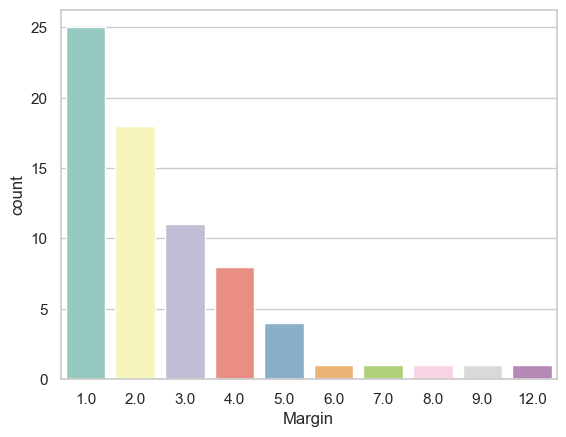

In [21]:
sns.set_theme(style="whitegrid", palette="Set3")
sns.countplot(x='Margin',data=winners_data)

It isn't surprising that most of the Masters Winners have won with a 1-2 stroke margin, but I didn't realize how little of them won with more than a 4 stroke margin.

In [22]:
# Largest winning margin
winners_data['winning_margin'] = winners_data['Margin'].max()

#Print the result
largest_margin = winners_data['winning_margin'].values[0]
golfer_name = winners_data['Name'][winners_data['Margin'].idxmax()]
year = winners_data['Year'][winners_data['Margin'].idxmax()]

print("The Golfer with the largest Winning Margin is {} with a margin of {} strokes in {}.".format(golfer_name, largest_margin, year))

The Golfer with the largest Winning Margin is Tiger Woods with a margin of 12.0 strokes in 1997.


While I knew that Tiger Woods is among the most dominant Golfers of all time, I am shocked at how much better Tiger was in that respective Masters Tournament.

### Biggest Comeback

In [23]:
# Replace non-numeric values with NaN
rankings = winners_data[['Ranking.1', 'Ranking.2', 'Ranking.3']].apply(pd.to_numeric, errors='coerce')

# Find the worst ranking
worst_ranking = rankings.max().max()

# Determine the name of the golfer with the lowest ranking
golfer_name = winners_data.loc[rankings.stack().idxmax()[0], 'Name']

# Compute the year of the tournament in which the worst ranking occurred
year = winners_data.loc[rankings.stack().idxmax()[0], 'Year']

# Determine the date and ranking of the tournament in which the worst ranking occurred
worst_ranking_date = rankings.stack().idxmax()
day = worst_ranking_date[1].replace('Ranking.', '')  # Extract day from column name
ranking = int(rankings.loc[worst_ranking_date])  # Get the ranking value

# Print the final result
print("{} made the biggest comeback among Masters winners with a ranking of {} on Day {} in {}.".format(golfer_name, int(worst_ranking), day, int(year)))

Tiger Woods made the biggest comeback among Masters winners with a ranking of 33 on Day 1 in 2005.


I was surprised to find that Tiger Woods not only won by the biggest margin, but also had the lowest ranking, and ended up winning the Masters. 